<bound method NDFrame.head of        Exam 1     Exam 2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]>
cost = 0.3
cost after optimization: 0.047246966177207084
theta: [[0.5999741 ]
 [0.28731408]
 [0.25777124]]


C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


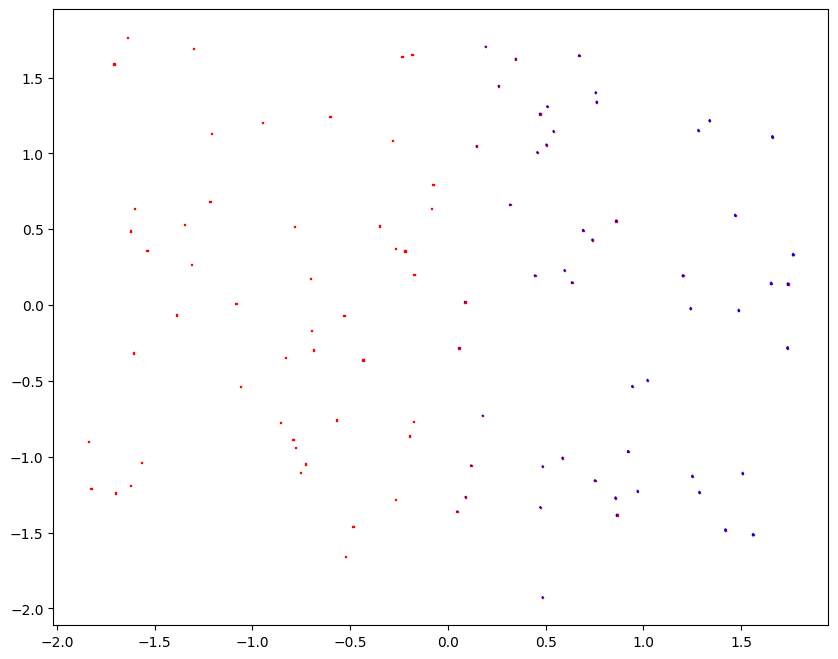

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
print(data.head)

m = 10  # number of examples
n = 2  # number of features

#1
X = data.values[:, :2].T #2x100
y = data.values[:, 2:].T #1x100
theta = np.zeros((X.shape[0]+1, 1)) #3x1

X = np.concatenate([np.ones([1, X.shape[1]]), X])

for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))
    
    
def computeCost(X, y, theta):
    h = theta.T @ X
    J = ((h - y)**2).sum() / (2*X.shape[1])
    return J


print(f'cost = {computeCost(X, y, theta)}')


def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        h = theta.T @ X
        h_y = h - y
        h_yxX = h_y @ X.T
        theta = theta - alpha * h_yxX.T / X.shape[1]

        cost += [computeCost(X, y, theta)]

    return theta, cost

#2

theta, cost = simple_gradient(X, y, theta, 0.01, 1000)

print(f'cost after optimization: {cost[-1]}')
print(f'theta: {theta}')

ones = []
zeros = []
for x in X:
    if x[0]==1:
        ones.append(x)
    else:
        zeros.append(x)
        
plt.figure(figsize=(10, 8))
plt.axis
plt.scatter(X[1],X[2], ones[0], marker = ",", color = "red")
plt.scatter(X[1],X[2], zeros[0], marker = "d", color = "blue")
plt.show()

In [54]:
#3

def sig(t):
    return 1/(1+np.e**(-t))

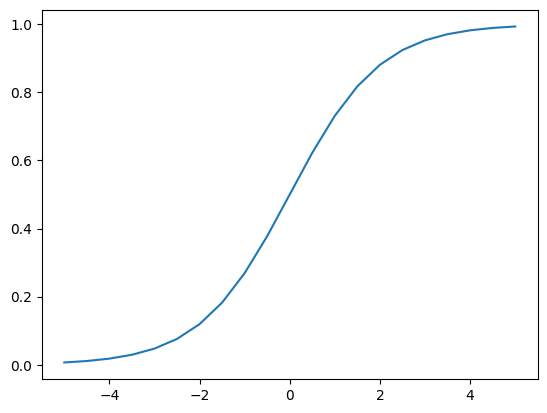

In [55]:
#4

x = np.linspace(5,-5,21)
plt.plot(x,sig(x))

In [56]:
#5

theta = np.zeros((X.shape[0], 1))
def cost(theta, X, y):
    return np.mean(sum(-y * np.log(sig(theta.T @ X)) - (1-y) * np.log(1 - sig(theta.T @ X))))

#6

def simple_gradient(X, y, theta, alpha, it):
    costs = []
    for _ in range(it):
        theta = theta - (X @ ((alpha/y.shape[1]) * (sig(theta.T @ X).sum(axis=0) - y.reshape(X.shape[1], )))).reshape(theta.shape[0],1)
        costs.append(cost(theta, X, y))
    costs = np.mean(costs)
    return theta, costs


print(simple_gradient(X, y, theta, 1, 150))

(array([[1.41957362],
       [3.35941597],
       [3.11271333]]), 0.23257345560259202)


In [57]:
#7

def mode(tm):
    tm[tm > 0.5] = 1
    tm[tm < 0.5] = 0
    return tm

def siglight(t):
    return 1/(1+np.e**(-mode(t)))

theta = np.zeros((X.shape[0], 1))
def cost2(theta, X, y):
    return np.mean(sum(-y * np.log(siglight(theta.T @ X)) - (1-y) * np.log(1 - siglight(theta.T @ X))))

def simple_gradient2(X, y, theta, alpha, it):
    costs = []
    for _ in range(it):
        theta = theta - (X @ ((alpha/y.shape[1]) * (siglight(theta.T @ X).sum(axis=0) - y.reshape(X.shape[1], )))).reshape(theta.shape[0],1)
        costs.append(cost2(theta, X, y))
    costs = np.mean(costs)
    return theta, costs


print(simple_gradient2(X, y, theta, 1, 150))

(array([[-1.52530954],
       [31.55488393],
       [28.41836701]]), 0.5295768182003824)


[[1.41957362]
 [3.35941597]
 [3.11271333]]


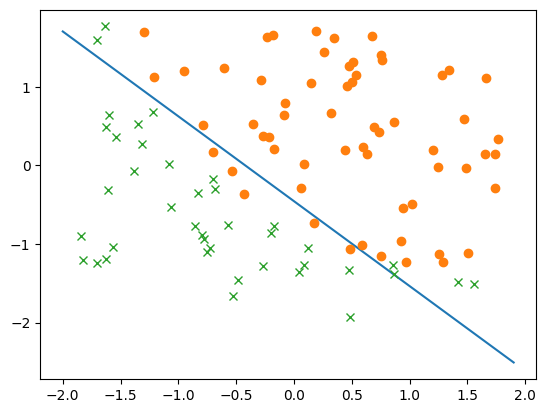

In [58]:
#8

theta, costs = simple_gradient(X, y, theta, 1, 150)
print(theta)
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o')
plt.plot(X1_0, X2_0, 'x')
plt.show()

In [59]:
# Logistic regression - Python

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [60]:
#1/2

logreg = LogisticRegression(random_state=0).fit(X, Y)

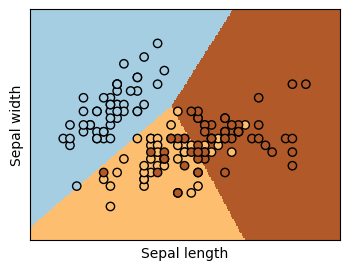

In [61]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [62]:
#3

logreg.predict(X[:2, :])
logreg.predict_proba(X[:2, :])

array([[0.92347315, 0.0585081 , 0.01801875],
       [0.791565  , 0.18091265, 0.02752235]])

In [63]:
#4

import sklearn
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, Y, scoring='recall_macro')

array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667])

In [64]:
cross_val_score(logreg, X, Y, scoring='balanced_accuracy')

array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667])